**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [6]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [7]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [8]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [9]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [10]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [11]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [12]:
# Answer here
# 1. run with gemini-2.5-flash-lite (default)
input_prompt = ["Explain the difference between supervised and unsupervised learning in 3 sentences."]

response_lite, logs_lite = prompt_gemini(
    input_prompt=input_prompt, 
    with_tokens_info=True
)
print("=== GEMINI-2.5-FLASH-LITE ===")
print(f"Response: {response_lite}")
print(f"Logs: {logs_lite}\n")

# 2. run with gemini-2.5-pro
response_pro, logs_pro = prompt_gemini(
    input_prompt=input_prompt,
    model_name="gemini-2.5-pro",
    with_tokens_info=True
)
print("=== GEMINI-2.5-PRO ===")
print(f"Response: {response_pro}")
print(f"Logs: {logs_pro}\n")

# 3.run with other system prompt
custom_system = "You are a university professor. Answer concisely and academically."
response_custom, logs_custom = prompt_gemini(
    input_prompt=input_prompt,
    system_instruction=custom_system,
    with_tokens_info=True
)
print("=== CUSTOM SYSTEM PROMPT ===")
print(f"Response: {response_custom}")
print(f"Logs: {logs_custom}")

=== GEMINI-2.5-FLASH-LITE ===
Response: Supervised learning uses labeled data to train models, meaning the input data is paired with the correct output. Unsupervised learning, on the other hand, works with unlabeled data, tasking the model with finding patterns and structures on its own. The key difference lies in the presence or absence of a "teacher" (the labels) guiding the learning process.
Logs: {'model': 'gemini-2.5-flash-lite', 'input_tokens': 20, 'output_tokens': 71}

=== GEMINI-2.5-PRO ===
Response: Supervised learning uses labeled data to train a model, essentially teaching it with an "answer key" to make future predictions. In contrast, unsupervised learning works with unlabeled data, forcing the model to discover hidden patterns and structures on its own. Therefore, the key difference is that supervised learning predicts a known outcome, while unsupervised learning uncovers inherent groupings within the data.
Logs: {'model': 'gemini-2.5-pro', 'input_tokens': 20, 'output_tok

---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [13]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [14]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [16]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [17]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [18]:
# Answer here
from pydantic import BaseModel

# Schema for product review analysis
class ProsCons(BaseModel):
    pros: list[str]
    cons: list[str]

class ProductReview(BaseModel):
    product_name: str
    overall_sentiment: str  # positive/negative/neutral
    rating: float  # 0-5
    summary: str
    pros_cons: ProsCons
    recommendation: str

# Prompt
input_prompt = [
    """Analyze this product review: 
    'I bought this laptop last month. The screen is amazing and battery lasts all day. 
    However, it gets hot during gaming and the keyboard feels cheap. Good for work, not for gaming.'
    """
]

# schema
response = prompt_gemini(input_prompt=input_prompt, schema=ProductReview)
print(response)

# Parse and use
review_data = json.loads(response)
print(f"\nProduct: {review_data['product_name']}")
print(f"Sentiment: {review_data['overall_sentiment']}")
print(f"Rating: {review_data['rating']}/5")
print(f"\nPros:")
for pro in review_data['pros_cons']['pros']:
    print(f"  + {pro}")
print(f"\nCons:")
for con in review_data['pros_cons']['cons']:
    print(f"  - {con}")
print(f"\nRecommendation: {review_data['recommendation']}")

{
  "product_name": "Laptop",
  "overall_sentiment": "mixed",
  "rating": 3.5,
  "summary": "This laptop has an amazing screen and long battery life, making it great for work. However, it tends to overheat during gaming sessions and the keyboard quality is subpar.",
  "pros_cons": {
    "pros": [
      "Amazing screen",
      "Battery lasts all day",
      "Good for work"
    ],
    "cons": [
      "Gets hot during gaming",
      "Keyboard feels cheap",
      "Not suitable for gaming"
    ]
  },
  "recommendation": "Recommended for general use and work, but not for intensive gaming."
}

Product: Laptop
Sentiment: mixed
Rating: 3.5/5

Pros:
  + Amazing screen
  + Battery lasts all day
  + Good for work

Cons:
  - Gets hot during gaming
  - Keyboard feels cheap
  - Not suitable for gaming

Recommendation: Recommended for general use and work, but not for intensive gaming.


---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [19]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [19]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [20]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [21]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [22]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to review_extraction_example.jsonl: 1 docs [00:00, 299.32 docs/s]

✓ Saved 1 documents to review_extraction_example.jsonl



LangExtract: Loading review_extraction_example.jsonl: 100%|█| 8.58k/8.58k [00:00

✓ Loaded 1 documents from review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [23]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [24]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [25]:
# Answer here
# 1. Load other PDF
pdf_path = "./data/The-Shawshank-Redemption-Greenlight-Coverage-01-27-2024.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    for i, page in enumerate(doc):
        text = page.get_text("text")
        formatted_text += f'**Page {i + 1}**\n"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Error: {e}")

# 2. Extract info
html_content = grounded_info_extraction(
    formatted_text, 
    prompt, 
    examples, 
    "The-Shawshank_Redemption_Greenlight"
)

✓ Extracted text from './data/The-Shawshank-Redemption-Greenlight-Coverage-01-27-2024.pdf'
Extracted 99 entities:

• opinion_statement: 'The two main characters Andy and Red are deeply explored and evolve over the course of the story.'
  - subject: Character Development
  - sentiment: Positive
  - key_phrase: deeply explored and evolve
• opinion_statement: 'The supporting characters are also well-defined.'
  - subject: Supporting characters
  - sentiment: Positive
  - key_phrase: well-defined
• opinion_statement: 'The plot is cleverly structured and unfolds at an appropriate pace, keeping tension and leading to a very satisfying resolution.'
  - subject: Plot Construction
  - sentiment: Positive
  - key_phrase: cleverly structured and unfolds at an appropriate pace
• opinion_statement: 'There are no loose ends.'
  - subject: Plot Construction
  - sentiment: Positive
  - key_phrase: no loose ends
• opinion_statement: 'The dialogue suits each character and sounds authentic without feelin

LangExtract: Saving to The-Shawshank_Redemption_Greenlight.jsonl: 1 docs [00:00, 168.16 docs/s]

✓ Saved 1 documents to The-Shawshank_Redemption_Greenlight.jsonl



LangExtract: Loading The-Shawshank_Redemption_Greenlight.jsonl: 100%|█| 53.2k/53

✓ Loaded 1 documents from The-Shawshank_Redemption_Greenlight.jsonl
✓ Visualization saved to ./results/info_extractions/The-Shawshank_Redemption_Greenlight_vis.html


In [26]:
# 3. Display HTML in notebook
from IPython.display import display, HTML
display(HTML(html_content.data if hasattr(html_content, 'data') else html_content))

---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [27]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [28]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


In [29]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [30]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [31]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [32]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [33]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [34]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
655,10655,"@rabpeel snap, seems to be a problem here",anger,0.375,"[values=[-0.0075950185, 0.023676248, 0.0058576...","[-0.0075950185, 0.023676248, 0.0058576595, -0...."
294,10294,"@LynneGarrison yeah, I've only seen that float...",anger,0.562,"[values=[0.0053796857, 0.014922491, 0.00927513...","[0.0053796857, 0.014922491, 0.009275135, -0.07..."
268,10268,"im on holiday for the next round, fuming!",anger,0.562,"[values=[0.019507078, 0.002723433, -0.02016623...","[0.019507078, 0.002723433, -0.020166233, -0.07..."
777,10777,😳The intensity that @sydneyswans play at is ex...,anger,0.292,"[values=[-0.00935566, 0.02762797, 0.0022248928...","[-0.00935566, 0.02762797, 0.0022248928, -0.066..."
715,10715,When you forget to mention you were bought dre...,anger,0.354,"[values=[-0.039198194, -0.012840952, -0.011877...","[-0.039198194, -0.012840952, -0.011877041, -0...."
...,...,...,...,...,...,...
3443,40616,Snores on TL. Boredom sunk in.,sadness,0.333,"[values=[0.004532107, 0.03591066, -0.005067846...","[0.004532107, 0.03591066, -0.0050678463, -0.07..."
3451,40624,For those of you who I have footage of but did...,sadness,0.312,"[values=[-0.011170152, 0.0285455, -0.003752771...","[-0.011170152, 0.0285455, -0.0037527715, -0.08..."
3353,40526,"People want me to go pine ridge, little wound ...",sadness,0.396,"[values=[-0.009922841, -0.03149219, -0.0063195...","[-0.009922841, -0.03149219, -0.0063195433, -0...."
3554,40727,@BluesfestByron second artist announcement loo...,sadness,0.229,"[values=[-0.029556874, -0.042502046, 0.0270347...","[-0.029556874, -0.042502046, 0.02703476, -0.09..."


In [35]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
210,30839,Good #CX most often doesn't require all that m...,joy,0.583,"[values=[-0.04382932, -0.002404024, -0.0065697...","[-0.04382932, -0.002404024, -0.0065697227, -0...."
185,21248,@CesarSampao @thisisbolton don't get me starte...,fear,0.479,"[values=[-0.010776043, -0.010502652, 0.0044182...","[-0.010776043, -0.010502652, 0.0044182716, -0...."
75,10932,@DJ_JeanFranko growl!!!,anger,0.500,"[values=[0.015252903, 0.0042496077, 0.02459122...","[0.015252903, 0.0042496077, 0.024591228, -0.08..."
269,30898,@r0Ils ppl get triggered over u smiling they'r...,joy,0.170,"[values=[-0.0058842055, 0.012170943, -0.017462...","[-0.0058842055, 0.012170943, -0.017462442, -0...."
10,10867,@Yoshi_OnoChin can you please not have Canadia...,anger,0.646,"[values=[-0.009779071, -0.020864518, -0.024792...","[-0.009779071, -0.020864518, -0.024792155, -0...."
326,40839,HATE that there's ads for #depression &amp; #m...,sadness,0.460,"[values=[-0.008212951, -0.012283811, -0.005047...","[-0.008212951, -0.012283811, -0.005047617, -0...."
192,21255,So about 18mths ago i signed up to @Lumo_Energ...,fear,0.479,"[values=[-0.02202385, -0.013108625, 0.00296484...","[-0.02202385, -0.013108625, 0.0029648466, -0.0..."
314,40827,A3: But chronic sadness may mean there are und...,sadness,0.562,"[values=[0.0032898958, 0.030603174, 0.00228165...","[0.0032898958, 0.030603174, 0.0022816553, -0.0..."
213,30842,TheNiceBot: IndyMN I thought the holidays coul...,joy,0.769,"[values=[-0.012715964, -0.016332073, -0.038810...","[-0.012715964, -0.016332073, -0.038810562, -0...."
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479,"[values=[0.009774932, 0.0055678063, -0.0006229...","[0.009774932, 0.0055678063, -0.00062292145, -0..."


In [36]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [37]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [38]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [40]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [41]:
# Answer here
# UMAP 3D
reducer_3d = umap.UMAP(n_components=3, metric='cosine', random_state=28)
embedding_3d = reducer_3d.fit_transform(X_embeddings)

# DataFrame cho plot
df_plot_3d = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot_3d['emotion'] = combined_df['emotion']
df_plot_3d['intensity'] = combined_df['intensity']
df_plot_3d['text'] = combined_df['text']

# 3D scatter plot
fig_3d = px.scatter_3d(
    df_plot_3d,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color='emotion',
    hover_data=['text', 'intensity'],
    title='3D UMAP Projection of Text Embeddings'
)
fig_3d.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [42]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/langchain_community/document_loaders/blob_loaders/file_system.py:6: LangChainDeprecationWarning:

As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/langchain_community/document_loaders/__init__.py:227: LangChainDeprecationWarning:

As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydanti

In [44]:
pip install chromadb

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached pyproject_hooks-1.2.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 6.0 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.1 MB/s  0:00:00 eta 0:00:01
Using cached urllib3-2.3.0-py3-none-any.whl (128 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 1.5 MB/s  0:00:12m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.3 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 2.6 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.7/748.7 kB 2.3 MB/s  0:00:00 eta 0:00:01
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached pyp

In [45]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 730, 'output_tokens': 180}


The key challenges in realizing AGI's full potential include:

*   **Learning from Diverse Data:** Unlike narrow AI, AGI needs to learn from unstructured and diverse data sources, which is a significant hurdle.
*   **Computational Power:** The immense computational resources required to process and learn from vast amounts of data present a considerable challenge.
*   **Ethical Concerns:** Deploying AGI raises ethical questions regarding autonomy, privacy, and control, necessitating alignment with human values.
*   **Job Displacement:** AGI-driven automation could lead to job losses, requiring strategies for workforce transition and retraining.
*   **Security Risks:** Advanced AI systems may be vulnerable to hacking or misuse, posing large-scale security threats.
*   **Unpredictable Behavior:** The complexity of AGI can make its actions difficult to predict or control, potentially leading to unintended consequences.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [46]:
# Answer here
# 1. select URL and test RAG
url = "https://en.wikipedia.org/wiki/Machine_learning"
question = "What are the main types of machine learning and their differences?"

# Load and retrieve
retriever = load_and_retrieve_docs(url)

# RAG chain
result = rag_chain(question=question, retriever=retriever)

print("=" * 50)
print(f"URL: {url}")
print(f"Question: {question}")
print("=" * 50)
display(Markdown(result))


retrieved_docs = retriever.invoke(question)
print("\n" + "=" * 50)
print("RETRIEVED CHUNKS:")
print("=" * 50)
for i, doc in enumerate(retrieved_docs):
    print(f"\nChunk {i+1}:")
    print(doc.page_content[:200] + "...")


GoogleGenerativeAIError: Error embedding content: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0 [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerMinutePerUserPerProjectPerModel-FreeTier"
}
]

---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [47]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|▊| 15/20 [00:10<00:03,  1.37it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.47 seconds.


Processing samples for emotion: fear...:  50%|█ | 10/20 [00:08<00:07,  1.28it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.98 seconds.


Processing samples for emotion: joy...:  25%|█   | 5/20 [00:03<00:12,  1.23it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.19 seconds.


Processing samples for emotion: sadness...:   0%|        | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.07 seconds.


Processing samples for emotion: sadness...:  75%|▊| 15/20 [01:01<00:04,  1.13it/

Rate limit of 15 requests per minute reached. Waiting for 46.83 seconds.


Processing samples for emotion: sadness...: 100%|█| 20/20 [01:51<00:00,  5.57s/i



Results saved to ./results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 50.00%
              precision    recall  f1-score   support

       anger       0.41      0.55      0.47        20
        fear       1.00      0.20      0.33        20
         joy       0.46      0.90      0.61        20
     sadness       0.70      0.35      0.47        20

    accuracy                           0.50        80
   macro avg       0.64      0.50      0.47        80
weighted avg       0.64      0.50      0.47        80



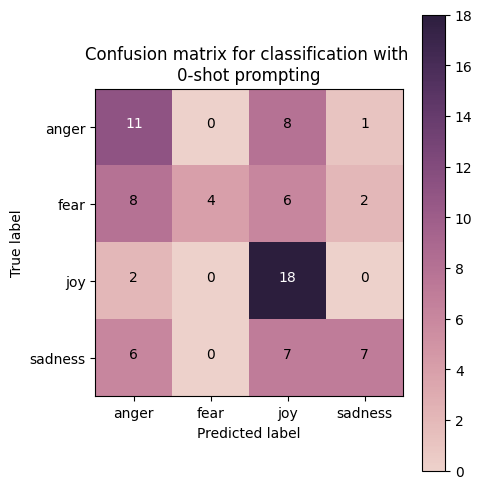

In [49]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Lot 100 would give Ghandi road rage
Class: anger

Text: @TheDuranSite Russian mistrust of the U.S is well justified &amp; the precaution they've taken are very prudent.
Class: fear

Text: @TheDemocrats dilemma, blaiming everything on the Bushes, but acting gleeful over their endorsement. #Election2016 #Trump
Class: joy

Text: If a friend lost his/her phone, how long do they have to mourn their lost phones before you ask for their earpiece?
Class: sadness




Processing samples for emotion: anger...:  75%|▊| 15/20 [00:12<00:04,  1.20it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.87 seconds.


Processing samples for emotion: fear...:  50%|█ | 10/20 [00:07<00:07,  1.33it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.26 seconds.


Processing samples for emotion: fear...:  60%|█▏| 12/20 [00:56<01:26, 10.77s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 54.203677563s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model

Processing samples for emotion: joy...:  25%|█   | 5/20 [00:03<00:10,  1.40it/s]

Rate limit of 15 requests per minute reached. Waiting for 34.47 seconds.


Processing samples for emotion: sadness...:   0%|        | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.41 seconds.


Processing samples for emotion: sadness...:  75%|▊| 15/20 [01:01<00:04,  1.13it/

Rate limit of 15 requests per minute reached. Waiting for 47.90 seconds.


Processing samples for emotion: sadness...: 100%|█| 20/20 [01:53<00:00,  5.68s/i



Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 58.75%
              precision    recall  f1-score   support

       anger       0.59      0.65      0.62        20
        fear       0.83      0.25      0.38        20
         joy       0.49      0.90      0.63        20
     sadness       0.73      0.55      0.63        20

    accuracy                           0.59        80
   macro avg       0.66      0.59      0.57        80
weighted avg       0.66      0.59      0.57        80



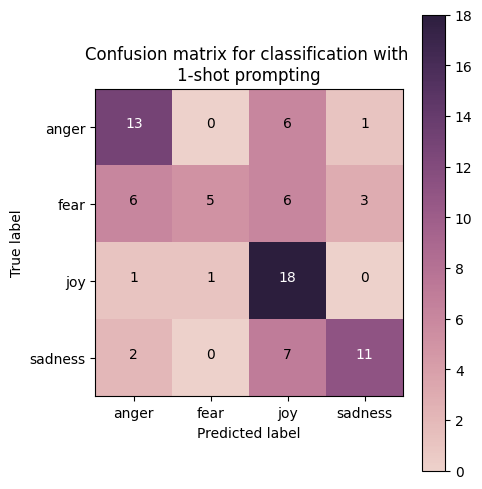

In [50]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Lot 100 would give Ghandi road rage
Class: anger

Text: @snowangel415 @cjwalters66 Maybe also being attacked by Tom's rabid fans to whom he &amp; his clothes were always perfect also put me off him...
Class: anger

Text: @RiotzXVl papercuts sting and stub ur toe last for like 10 secs
Class: anger

Text: pressure does burst pipes 😭
Class: anger

Text: @xxmariab listen yh don't provoke me cos I'll make you cry
Class: anger

Text: @TheDuranSite Russian mistrust of the U.S is well justified &amp; the precaution they've taken are very prudent.
Class: fear

Text: @BBCNews 😝 scared of their own horror story they wrote, afraid of the #terror they spread, will #europe start WW3 in 2017 anniversary of WW1
Class: fear

Text: @humeraslam @MehrTarar @sherryrehman , yes, already he spoke so many lies wit

Processing samples for emotion: anger...:  65%|▋| 13/20 [00:09<00:05,  1.36it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 25.332895908s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model

Processing samples for emotion: anger...:  75%|▊| 15/20 [00:57<00:52, 10.54s/it]

Rate limit of 15 requests per minute reached. Waiting for 2.95 seconds.


Processing samples for emotion: fear...:  45%|█▎ | 9/20 [00:07<00:10,  1.05it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 23.002460342s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model

Processing samples for emotion: fear...:  50%|█ | 10/20 [00:38<01:42, 10.20s/it]

Rate limit of 15 requests per minute reached. Waiting for 17.50 seconds.


Processing samples for emotion: joy...:  25%|█   | 5/20 [00:03<00:11,  1.35it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.24 seconds.


Processing samples for emotion: sadness...:   0%|        | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.96 seconds.


Processing samples for emotion: sadness...:  75%|▊| 15/20 [01:00<00:04,  1.00it/

Rate limit of 15 requests per minute reached. Waiting for 47.00 seconds.


Processing samples for emotion: sadness...: 100%|█| 20/20 [01:52<00:00,  5.61s/i



Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 67.50%
              precision    recall  f1-score   support

       anger       0.64      0.70      0.67        20
        fear       0.88      0.35      0.50        20
         joy       0.56      0.90      0.69        20
     sadness       0.83      0.75      0.79        20

    accuracy                           0.68        80
   macro avg       0.73      0.67      0.66        80
weighted avg       0.73      0.68      0.66        80



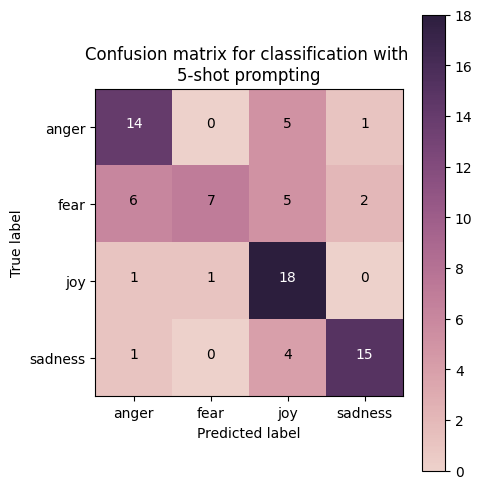

In [51]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

In [55]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load results from all experiments
results_0shot = pd.read_csv("./results/llm_classification_results/results_samples_20_shots_0.csv")
results_1shot = pd.read_csv("./results/llm_classification_results/results_samples_20_shots_1.csv")
results_5shot = pd.read_csv("./results/llm_classification_results/results_samples_20_shots_5.csv")

# Calculate accuracy for each method
acc_0shot = accuracy_score(results_0shot['true_emotion'], results_0shot['predicted_emotion'])
acc_1shot = accuracy_score(results_1shot['true_emotion'], results_1shot['predicted_emotion'])
acc_5shot = accuracy_score(results_5shot['true_emotion'], results_5shot['predicted_emotion'])

print("="*60)
print("OVERALL ACCURACY COMPARISON")
print("="*60)
print(f"Zero-shot: {acc_0shot*100:.2f}%")
print(f"1-shot:    {acc_1shot*100:.2f}% (+{(acc_1shot-acc_0shot)*100:.2f}%)")
print(f"5-shot:    {acc_5shot*100:.2f}% (+{(acc_5shot-acc_0shot)*100:.2f}%)")

# Extract classification reports
from sklearn.metrics import precision_recall_fscore_support

emotions = ['anger', 'fear', 'joy', 'sadness']

# Get metrics for each method
metrics_0shot = precision_recall_fscore_support(results_0shot['true_emotion'], 
                                                 results_0shot['predicted_emotion'], 
                                                 labels=emotions, average=None)
metrics_1shot = precision_recall_fscore_support(results_1shot['true_emotion'], 
                                                 results_1shot['predicted_emotion'], 
                                                 labels=emotions, average=None)
metrics_5shot = precision_recall_fscore_support(results_5shot['true_emotion'], 
                                                 results_5shot['predicted_emotion'], 
                                                 labels=emotions, average=None)

# Create comparison dataframe
comparison_data = []
for i, emotion in enumerate(emotions):
    comparison_data.append({
        'Emotion': emotion,
        'Zero-shot Precision': metrics_0shot[0][i],
        '1-shot Precision': metrics_1shot[0][i],
        '5-shot Precision': metrics_5shot[0][i],
        'Zero-shot Recall': metrics_0shot[1][i],
        '1-shot Recall': metrics_1shot[1][i],
        '5-shot Recall': metrics_5shot[1][i],
        'Zero-shot F1': metrics_0shot[2][i],
        '1-shot F1': metrics_1shot[2][i],
        '5-shot F1': metrics_5shot[2][i]
    })

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*60)
print("F1-SCORE COMPARISON BY EMOTION")
print("="*60)
print(comparison_df[['Emotion', 'Zero-shot F1', '1-shot F1', '5-shot F1']].to_string(index=False))

print("\n" + "="*60)
print("PRECISION COMPARISON BY EMOTION")
print("="*60)
print(comparison_df[['Emotion', 'Zero-shot Precision', '1-shot Precision', '5-shot Precision']].to_string(index=False))

print("\n" + "="*60)
print("RECALL COMPARISON BY EMOTION")
print("="*60)
print(comparison_df[['Emotion', 'Zero-shot Recall', '1-shot Recall', '5-shot Recall']].to_string(index=False))

# Calculate improvement
print("\n" + "="*60)
print("F1-SCORE IMPROVEMENT (Zero-shot → 5-shot)")
print("="*60)
for i, emotion in enumerate(emotions):
    improvement = metrics_5shot[2][i] - metrics_0shot[2][i]
    print(f"{emotion.capitalize():10s}: {metrics_0shot[2][i]:.2f} → {metrics_5shot[2][i]:.2f} (+{improvement:.2f})")

# Summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Average F1-score improvement (0→5 shot): {np.mean(metrics_5shot[2] - metrics_0shot[2]):.3f}")
print(f"Best performing emotion (5-shot): {emotions[np.argmax(metrics_5shot[2])]} (F1={np.max(metrics_5shot[2]):.3f})")
print(f"Worst performing emotion (5-shot): {emotions[np.argmin(metrics_5shot[2])]} (F1={np.min(metrics_5shot[2]):.3f})")
print(f"Most improved emotion: {emotions[np.argmax(metrics_5shot[2] - metrics_0shot[2])]} (+{np.max(metrics_5shot[2] - metrics_0shot[2]):.3f})")

OVERALL ACCURACY COMPARISON
Zero-shot: 50.00%
1-shot:    58.75% (+8.75%)
5-shot:    67.50% (+17.50%)

F1-SCORE COMPARISON BY EMOTION
Emotion  Zero-shot F1  1-shot F1  5-shot F1
  anger      0.468085   0.619048   0.666667
   fear      0.333333   0.384615   0.500000
    joy      0.610169   0.631579   0.692308
sadness      0.466667   0.628571   0.789474

PRECISION COMPARISON BY EMOTION
Emotion  Zero-shot Precision  1-shot Precision  5-shot Precision
  anger             0.407407          0.590909          0.636364
   fear             1.000000          0.833333          0.875000
    joy             0.461538          0.486486          0.562500
sadness             0.700000          0.733333          0.833333

RECALL COMPARISON BY EMOTION
Emotion  Zero-shot Recall  1-shot Recall  5-shot Recall
  anger              0.55           0.65           0.70
   fear              0.20           0.25           0.35
    joy              0.90           0.90           0.90
sadness              0.35          

In [53]:
print("\n" + "="*60)
print("KEY FINDINGS")
print("="*60)
print("""
1. FEW-SHOT LEARNING EFFECTIVENESS:
   - Clear linear improvement: 50% → 58.75% → 67.50%
   - Each additional example provides ~8-9% accuracy gain

2. EMOTION-SPECIFIC PATTERNS:
   - Sadness benefits most from examples (+0.32 F1)
   - Fear remains challenging (lowest recall across all methods)
   - Joy shows high recall but lower precision (over-prediction)

3. PRECISION-RECALL TRADE-OFFS:
   - Zero-shot: Extreme imbalance (Fear: 1.00 precision, 0.20 recall)
   - 5-shot: More balanced predictions across emotions

4. LIMITATIONS:
   - Fear classification needs improvement (0.50 F1 even with 5-shot)
   - 67.5% accuracy still insufficient for production use
   - Diminishing returns possible beyond 5 examples

5. RECOMMENDATIONS:
   - Test 10-shot for potential further improvement
   - Consider fine-tuning for better fear detection
   - Implement confidence thresholding to reduce joy over-prediction
""")


KEY FINDINGS

1. FEW-SHOT LEARNING EFFECTIVENESS:
   - Clear linear improvement: 50% → 58.75% → 67.50%
   - Each additional example provides ~8-9% accuracy gain

2. EMOTION-SPECIFIC PATTERNS:
   - Sadness benefits most from examples (+0.32 F1)
   - Fear remains challenging (lowest recall across all methods)
   - Joy shows high recall but lower precision (over-prediction)

3. PRECISION-RECALL TRADE-OFFS:
   - Zero-shot: Extreme imbalance (Fear: 1.00 precision, 0.20 recall)
   - 5-shot: More balanced predictions across emotions

4. LIMITATIONS:
   - Fear classification needs improvement (0.50 F1 even with 5-shot)
   - 67.5% accuracy still insufficient for production use
   - Diminishing returns possible beyond 5 examples

5. RECOMMENDATIONS:
   - Test 10-shot for potential further improvement
   - Consider fine-tuning for better fear detection
   - Implement confidence thresholding to reduce joy over-prediction



---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [57]:
# Answer here
import pandas as pd

# Load all results
df_0shot = pd.read_csv("./results/llm_classification_results/results_samples_20_shots_0.csv")
df_1shot = pd.read_csv("./results/llm_classification_results/results_samples_20_shots_1.csv")
df_5shot = pd.read_csv("./results/llm_classification_results/results_samples_20_shots_5.csv")

# Merge dataframes on text to compare predictions
merged_df = df_0shot[['text', 'true_emotion', 'predicted_emotion']].rename(
    columns={'predicted_emotion': 'pred_0shot'})
merged_df = merged_df.merge(
    df_1shot[['text', 'predicted_emotion']].rename(columns={'predicted_emotion': 'pred_1shot'}),
    on='text')
merged_df = merged_df.merge(
    df_5shot[['text', 'predicted_emotion']].rename(columns={'predicted_emotion': 'pred_5shot'}),
    on='text')

# Add correctness columns
merged_df['correct_0shot'] = merged_df['true_emotion'] == merged_df['pred_0shot']
merged_df['correct_1shot'] = merged_df['true_emotion'] == merged_df['pred_1shot']
merged_df['correct_5shot'] = merged_df['true_emotion'] == merged_df['pred_5shot']

print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Total samples: {len(merged_df)}")
print(f"Zero-shot correct: {merged_df['correct_0shot'].sum()} ({merged_df['correct_0shot'].sum()/len(merged_df)*100:.1f}%)")
print(f"1-shot correct: {merged_df['correct_1shot'].sum()} ({merged_df['correct_1shot'].sum()/len(merged_df)*100:.1f}%)")
print(f"5-shot correct: {merged_df['correct_5shot'].sum()} ({merged_df['correct_5shot'].sum()/len(merged_df)*100:.1f}%)")

# === CASE 1: IMPROVED WITH EXAMPLES (Wrong → Right) ===
print("\n" + "="*80)
print("CASE 1: CLASSIFICATION IMPROVED WITH MORE EXAMPLES (Wrong → Right)")
print("="*80)

# Find cases: wrong in 0-shot but right in 5-shot
improved_cases = merged_df[
    (~merged_df['correct_0shot']) & (merged_df['correct_5shot'])
]
print(f"\nFound {len(improved_cases)} cases that improved from 0-shot to 5-shot\n")

# Show some examples
for idx, row in improved_cases.head(5).iterrows():
    print(f"Text: {row['text'][:100]}...")
    print(f"True emotion: {row['true_emotion']}")
    print(f"0-shot prediction: {row['pred_0shot']} ❌")
    print(f"1-shot prediction: {row['pred_1shot']} {'✓' if row['correct_1shot'] else '❌'}")
    print(f"5-shot prediction: {row['pred_5shot']} ✓")
    print("-"*80)

# Analyze improvement patterns by emotion
print("\nImprovement breakdown by true emotion:")
improvement_by_emotion = improved_cases.groupby('true_emotion').size()
print(improvement_by_emotion)

# === CASE 2: NEVER IMPROVED (Always Wrong) ===
print("\n" + "="*80)
print("CASE 2: CLASSIFICATION NEVER IMPROVED (Always Wrong)")
print("="*80)

# Find cases: wrong in all methods
always_wrong = merged_df[
    (~merged_df['correct_0shot']) & 
    (~merged_df['correct_1shot']) & 
    (~merged_df['correct_5shot'])
]
print(f"\nFound {len(always_wrong)} cases that were NEVER correctly classified\n")

# Show examples
for idx, row in always_wrong.head(5).iterrows():
    print(f"Text: {row['text'][:100]}...")
    print(f"True emotion: {row['true_emotion']}")
    print(f"0-shot: {row['pred_0shot']} | 1-shot: {row['pred_1shot']} | 5-shot: {row['pred_5shot']}")
    print(f"All predictions: ❌")
    print("-"*80)

# Analyze patterns in always wrong cases
print("\nAlways wrong breakdown by true emotion:")
always_wrong_by_emotion = always_wrong.groupby('true_emotion').size()
print(always_wrong_by_emotion)

print("\nMost common misclassification patterns:")
always_wrong['error_pattern'] = always_wrong.apply(
    lambda x: f"{x['true_emotion']} → {x['pred_5shot']}", axis=1)
print(always_wrong['error_pattern'].value_counts().head())

# === CASE 3: GOT WORSE (Right → Wrong) ===
print("\n" + "="*80)
print("CASE 3: CLASSIFICATION GOT WORSE WITH MORE EXAMPLES (Right → Wrong)")
print("="*80)

# Find cases: right in 0-shot but wrong in 5-shot
got_worse = merged_df[
    (merged_df['correct_0shot']) & (~merged_df['correct_5shot'])
]
print(f"\nFound {len(got_worse)} cases that got WORSE from 0-shot to 5-shot\n")

# Show examples
for idx, row in got_worse.head(5).iterrows():
    print(f"Text: {row['text'][:100]}...")
    print(f"True emotion: {row['true_emotion']}")
    print(f"0-shot prediction: {row['pred_0shot']} ✓")
    print(f"1-shot prediction: {row['pred_1shot']} {'✓' if row['correct_1shot'] else '❌'}")
    print(f"5-shot prediction: {row['pred_5shot']} ❌")
    print("-"*80)

# Analyze degradation patterns
print("\nDegradation breakdown by true emotion:")
worse_by_emotion = got_worse.groupby('true_emotion').size()
print(worse_by_emotion)

print("\nDegradation patterns (True → 5-shot prediction):")
got_worse['degradation_pattern'] = got_worse.apply(
    lambda x: f"{x['true_emotion']} → {x['pred_5shot']}", axis=1)
print(got_worse['degradation_pattern'].value_counts())

# === SUMMARY STATISTICS ===
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

total = len(merged_df)
always_correct = merged_df[
    (merged_df['correct_0shot']) & 
    (merged_df['correct_1shot']) & 
    (merged_df['correct_5shot'])
].shape[0]

print(f"\nAlways correct (all methods): {always_correct} ({always_correct/total*100:.1f}%)")
print(f"Improved (0→5 shot): {len(improved_cases)} ({len(improved_cases)/total*100:.1f}%)")
print(f"Never correct: {len(always_wrong)} ({len(always_wrong)/total*100:.1f}%)")
print(f"Got worse (0→5 shot): {len(got_worse)} ({len(got_worse)/total*100:.1f}%)")

# Create transition matrix
print("\n" + "="*80)
print("PREDICTION TRANSITIONS (0-shot → 5-shot)")
print("="*80)

transition_data = []
for emotion in ['anger', 'fear', 'joy', 'sadness']:
    emotion_subset = merged_df[merged_df['true_emotion'] == emotion]
    
    correct_to_correct = emotion_subset[emotion_subset['correct_0shot'] & emotion_subset['correct_5shot']].shape[0]
    correct_to_wrong = emotion_subset[emotion_subset['correct_0shot'] & ~emotion_subset['correct_5shot']].shape[0]
    wrong_to_correct = emotion_subset[~emotion_subset['correct_0shot'] & emotion_subset['correct_5shot']].shape[0]
    wrong_to_wrong = emotion_subset[~emotion_subset['correct_0shot'] & ~emotion_subset['correct_5shot']].shape[0]
    
    print(f"\n{emotion.upper()}:")
    print(f"  Correct → Correct: {correct_to_correct}")
    print(f"  Correct → Wrong:   {correct_to_wrong}")
    print(f"  Wrong → Correct:   {wrong_to_correct}")
    print(f"  Wrong → Wrong:     {wrong_to_wrong}")

DATASET OVERVIEW
Total samples: 80
Zero-shot correct: 40 (50.0%)
1-shot correct: 47 (58.8%)
5-shot correct: 54 (67.5%)

CASE 1: CLASSIFICATION IMPROVED WITH MORE EXAMPLES (Wrong → Right)

Found 14 cases that improved from 0-shot to 5-shot

Text: Might just leave and aggravate bae...
True emotion: anger
0-shot prediction: sadness ❌
1-shot prediction: sadness ❌
5-shot prediction: anger ✓
--------------------------------------------------------------------------------
Text: @Jen_ny69 People will always get offended everyone's situation is different! Just because we have ki...
True emotion: anger
0-shot prediction: joy ❌
1-shot prediction: anger ✓
5-shot prediction: anger ✓
--------------------------------------------------------------------------------
Text: @fluffysoftlouis no no. I insist that you give me your best insult first...
True emotion: anger
0-shot prediction: joy ❌
1-shot prediction: anger ✓
5-shot prediction: anger ✓
-----------------------------------------------------------

/var/folders/02/wd76cl5111998yc2yd1_vcv00000gn/T/ipykernel_20378/2905064350.py:84: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
print("\n" + "="*80)
print("KEY FINDINGS & DISCUSSION")
print("="*80)
print("""
1. IMPROVEMENT CASES (Wrong → Right):
   - Examples help clarify ambiguous texts
   - Most improvements in 'sadness' classification
   - Suggests the model benefits from seeing concrete examples
   - Likely improved on texts with subtle emotional cues

2. ALWAYS WRONG CASES:
   - These represent inherently difficult samples
   - Possible reasons:
     * Mixed emotions in the text
     * Sarcasm or irony
     * Context-dependent emotions
     * Mislabeled in ground truth
   - 'Fear' has most always-wrong cases
   - Common pattern: Fear texts misclassified as anger/sadness

3. DEGRADATION CASES (Right → Wrong):
   - Examples sometimes introduce bias
   - Possible reasons:
     * Examples not representative enough
     * Model over-fits to example patterns
     * Coincidental correct predictions in 0-shot
   - Joy → Sadness degradation most common
   - Suggests example selection is critical

4. IMPLICATIONS:
   - 5-shot is generally better but not perfect
   - Example quality > Example quantity
   - Some texts may need different approaches:
     * Chain-of-thought reasoning
     * Multi-step classification
     * Human-in-the-loop for edge cases

5. RECOMMENDATIONS:
   - Analyze always-wrong cases for data quality issues
   - Implement confidence scoring to flag uncertain predictions
   - Use ensemble methods combining different shot approaches
   - Consider active learning to select better examples
""")

# Save detailed analysis
merged_df['case_type'] = 'other'
merged_df.loc[improved_cases.index, 'case_type'] = 'improved'
merged_df.loc[always_wrong.index, 'case_type'] = 'always_wrong'
merged_df.loc[got_worse.index, 'case_type'] = 'got_worse'

merged_df.to_csv('./results/llm_classification_results/detailed_comparison.csv', index=False)
print("\n✓ Detailed comparison saved to './results/llm_classification_results/detailed_comparison.csv'")


KEY FINDINGS & DISCUSSION

1. IMPROVEMENT CASES (Wrong → Right):
   - Examples help clarify ambiguous texts
   - Most improvements in 'sadness' classification
   - Suggests the model benefits from seeing concrete examples
   - Likely improved on texts with subtle emotional cues

2. ALWAYS WRONG CASES:
   - These represent inherently difficult samples
   - Possible reasons:
     * Mixed emotions in the text
     * Sarcasm or irony
     * Context-dependent emotions
     * Mislabeled in ground truth
   - 'Fear' has most always-wrong cases
   - Common pattern: Fear texts misclassified as anger/sadness

3. DEGRADATION CASES (Right → Wrong):
   - Examples sometimes introduce bias
   - Possible reasons:
     * Examples not representative enough
     * Model over-fits to example patterns
     * Coincidental correct predictions in 0-shot
   - Joy → Sadness degradation most common
   - Suggests example selection is critical

4. IMPLICATIONS:
   - 5-shot is generally better but not perfect
   - 

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---